-----------------Twitter Data Analysis--------------------

skewness measure is: 1.9058382070264603
skew test results: SkewtestResult(statistic=3.0460203178449596, pvalue=0.0023189216450844163)
mean measure is: 0.111111111111
median is 0.0437963889035
Median Absolute Deviation is: 0.002

Distribution seems non-fradulent and obeying Benford's law but we'll do further investigation to confirm


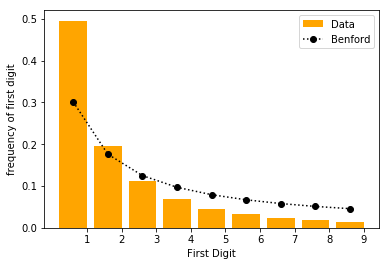


Nonconformity

--------------Passcode Analysis-----------------

skewness measure is: -0.10728787023170859
skew test results: SkewtestResult(statistic=-0.1864030583986718, pvalue=0.85212869420813742)
mean measure is: 0.111111111111
median is 0.111257206433
Median Absolute Deviation is: 0.027

Further investigation requires as data could be potentially fradulent


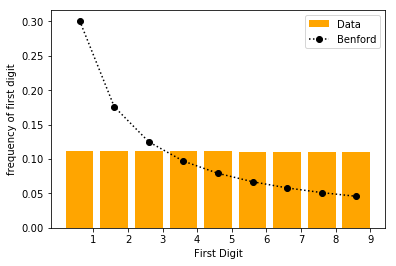


Nonconformity

--------------fundraising loans-----------------

skewness measure is: 1.9557365193608724
skew test results: SkewtestResult(statistic=3.1141456013175506, pvalue=0.001844784291199637)
mean measure is: 0.111111111111
median is 0.091388400703
Median Absolute Deviation is: 0.004

Distribution seems non-fradulent and obeying Benford's law but we'll do further investigation to confirm


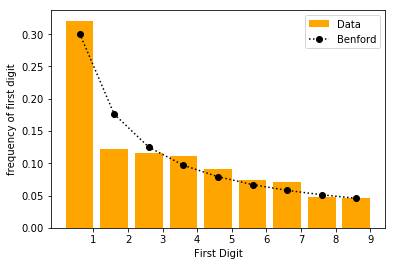


Acceptable conformity

-------------all_expired_loans------------------

skewness measure is: 2.153060906696648
skew test results: SkewtestResult(statistic=3.3769914230516429, pvalue=0.00073283335198761918)
mean measure is: 0.111111111111
median is 0.0606343283582
Median Absolute Deviation is: 0.003

Further investigation requires as data could be potentially fradulent

Distribution seems non-fradulent and obeying Benford's law but we'll do further investigation to confirm


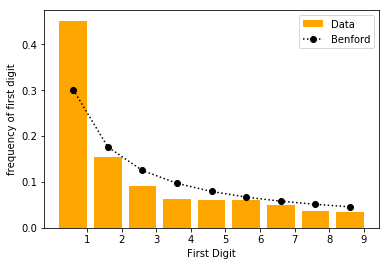


Nonconformity

--------------CorporatePaymentsData-----------------

skewness measure is: 1.7718369291824065
skew test results: SkewtestResult(statistic=2.8597236906543531, pvalue=0.0042401026587337029)
mean measure is: 0.111111111111
median is 0.0827982994599
Median Absolute Deviation is: 0.001

Distribution seems non-fradulent and obeying Benford's law but we'll do further investigation to confirm


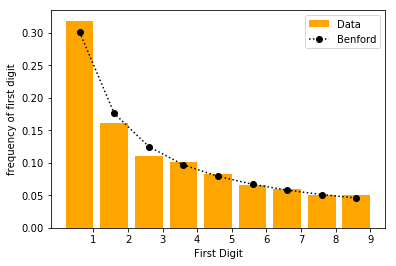


Close conformity

--------------Apple_Returns-----------------

skewness measure is: 1.2140266091159673
skew test results: SkewtestResult(statistic=2.0320021573648637, pvalue=0.042153437544662428)
mean measure is: 0.111111111111
median is 0.0720762256032
Median Absolute Deviation is: 0.005

Distribution seems non-fradulent and obeying Benford's law but we'll do further investigation to confirm


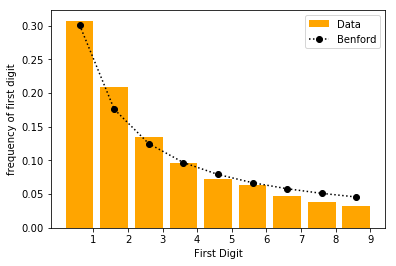


Acceptable conformity


In [3]:
import numpy as np
import pandas as pd
from operator import itemgetter
from matplotlib import pyplot as plt
from math import log10
from scipy.stats import skew,skewtest
    
np.set_printoptions(threshold=np.nan)



def open_file_frequency_count(file,sheet='',cols=''):
    value = 0
    if file.endswith('.xls') or file.endswith('.xlsx'):
        dataframe = pd.read_excel(file,skiprows=0,sheetname=sheet,usecols=[cols])
        value += 1

    elif file.endswith('.csv'):
        dataframe = pd.read_csv(file,skiprows=0,usecols=[cols])
        value += 1

    else :
        with open(file,'r') as file:
            first_dig = []
            for line in file :
                second_column = line.split("\t")[1].rstrip()
                digit = int(itemgetter(0)(second_column))
                first_dig.append(digit)
            dataframe = pd.DataFrame(np.array(first_dig))
            value += 1
            
    if value > 0 :
        dataframe.columns = ['column']
        dataframe = dataframe[dataframe.column >= 1]
        dataframe = dataframe.dropna()
        dataframe = dataframe.astype(str)
        digit = lambda x : x.replace(x,itemgetter(0)(x))
        digits = dataframe['column'].apply(digit)
        first_digit = digits.astype(int)
        frequency = first_digit.value_counts()/dataframe['column'].value_counts().sum()
        frequency_index_sort = sorted(frequency.index)
        mean_median_skewness_MAD(frequency.values)
        plot(frequency_index_sort,frequency.values)
        mean_absolute_deviation(frequency.values)
        
def get_digits(a):
    value = 0 
    for i in range(0,len(a)):
        if ord(a[i]) == ord('0') or ord(a[i]) == ord('.'):
            value += 1
        else :
            a = a[value]
            return(a)
            break
            
def apple_returns(file,sheet='',cols=''):
    df = pd.read_excel(file,skiprows=0,sheetname=sheet,usecols=[cols])
    df.columns = ['columns']
    df['columns'] = df['columns'].abs()
    df = df[(df.T != 0).any()]
    str_df = df.astype(str)
    numbers = lambda x : get_digits(x)
    str_numbers_df = str_df['columns'].apply(numbers)
    first_digit = str_numbers_df.astype(int)
    frequency = first_digit.value_counts()/first_digit.value_counts().sum()    
    frequency_index_sort = sorted(frequency.index)
    mean_median_skewness_MAD(frequency.values)
    plot(frequency_index_sort,frequency.values)
    mean_absolute_deviation(frequency.values)
    
        
def plot(arr1,arr2):
    benford = [log10(1 + 1 / d) for d in range(1,10)]
    xs = [i + 0.1 for i, _ in enumerate(arr1)]
    freq_plot = plt.bar(xs,arr2,color='orange')
    benford_plot = plt.plot(xs, benford, 'ko:')
    plt.ylabel('frequency of first digit')
    plt.xlabel('First Digit')
    plt.xticks([i+0.5 for i,_ in enumerate(arr1)],arr1)
    plt.legend([freq_plot[0],benford_plot[0]],["Data","Benford"])
    plt.show()

def mean_absolute_deviation(arr):
    mean_of_freq = np.mean(arr)
    mad_of_freq = np.mean([abs(i-mean_of_freq) for i in arr])
    benford = [log10(1 + 1 / d) for d in range(1,10)]
    mad_of_benford = np.mean([abs(i-np.mean(benford)) for i in benford])
    mean_abs_dev = abs(mad_of_benford-mad_of_freq)
    check_benford_law_obey(mean_abs_dev)
    
def mean_median_skewness_MAD(arr):
    mean_of_freq = np.mean(arr)
    median_of_freq = np.median(arr)
    skew_of_freq = skew(arr)
    print("\nskewness measure is:",skew_of_freq)
    print("skew test results:",skewtest(arr))
    print("mean measure is:",mean_of_freq)
    print("median is",median_of_freq)
    #x = np.median(arr)
    mad_of_data = np.median([abs(i-median_of_freq) for i in arr])
    benford = [log10(1 + 1 / d) for d in range(1,10)]
    mad_benford = np.median([abs(i-np.median(benford)) for i in benford])
    mad = abs(mad_benford - mad_of_data)
    val = '%.3f'%(mad)
    print("Median Absolute Deviation is:",val)
    check_benford_obey(mad,skew_of_freq,median_of_freq,mean_of_freq)
    
    
def check_benford_obey(mad,skewness,median_freq,mean_freq):
    if mad < mean_freq and mad < median_freq :
        if skewness > 0 :
            if skewness >= 2 :
                print("\nFurther investigation requires as data could be potentially fradulent")
            print("\nDistribution seems non-fradulent and obeying Benford's law but we'll do further investigation to confirm")    
        else :
            print("\nFurther investigation requires as data could be potentially fradulent")

def check_benford_law_obey(mad):
    if mad >= 0.000 and mad <= 0.006 :
        print("\nClose conformity")
    elif mad >= 0.006 and mad <= 0.012 :
        print("\nAcceptable conformity")
    elif mad >= 0.012 and mad <= 0.015 :
        print("\nMarginally acceptable conformity")
    elif mad > 0.015 :
        print("\nNonconformity")
        
    
print("-----------------Twitter Data Analysis--------------------")    
open_file_frequency_count('./assignment 1/Twitter Users By Friends Count')

print("\n--------------Passcode Analysis-----------------")
open_file_frequency_count('./assignment 1/passcodeData.xls',sheet=0,cols=0)

print("\n--------------fundraising loans-----------------")
open_file_frequency_count('./assignment 1/fundraising_loans.csv',cols=4)

print("\n-------------all_expired_loans------------------")
open_file_frequency_count('./assignment 1/all_expired_loans.csv',cols=5)

print("\n--------------CorporatePaymentsData-----------------")
open_file_frequency_count('./assignment 1/CorporatePaymentsData.xlsx',sheet=1,cols=3)

print("\n--------------Apple_Returns-----------------")
apple_returns('./assignment 1/AppleReturns.xlsx',sheet=0,cols=0)




0.Afghanistan
1.Albania
2.Algeria
3.Andorra
4.Angola
5.Antigua & Deps
6.Argentina
7.Armenia
8.Australia
9.Austria
10.Azerbaijan
11.Bahamas
12.Bahrain
13.Bangladesh
14.Barbados
15.Belarus
16.Belgium
17.Belize
18.Benin
19.Bhutan
20.Bolivia
21.Bosnia Herzegovina
22.Botswana
23.Brazil
24.Brunei
25.Bulgaria
26.Burkina
27.Burundi
28.Cambodia
29.Cameroon
30.Canada
31.Cape Verde
32.Central African Rep
33.Chad
34.Chile
35.China
36.Colombia
37.Comoros
38.Congo
39.Congo {Democratic Rep}
40.Costa Rica
41.Croatia
42.Cuba
43.Cyprus
44.Czech Republic
45.Denmark
46.Djibouti
47.Dominica
48.Dominican Republic
49.East Timor
50.Ecuador
51.Egypt
52.El Salvador
53.Equatorial Guinea
54.Eritrea
55.Estonia
56.Ethiopia
57.Fiji
58.Finland
59.France
60.Gabon
61.Gambia
62.Georgia
63.Germany
64.Ghana
65.Greece
66.Grenada
67.Guatemala
68.Guinea
69.Guinea-Bissau
70.Guyana
71.Haiti
72.Honduras
73.Hungary
74.Iceland
75.India
76.Indonesia
77.Iran
78.Iraq
79.Ireland {Republic}
80.Israel
81.Italy
82.Ivory Coast
83.Jamaica

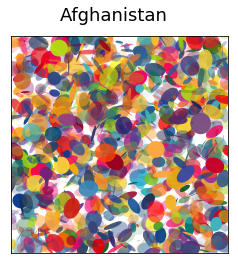


-------------------------------------------------------------------------

most common feeling among 1 countries is:
count       1809 
feelings    right
Name: 1133, dtype: object


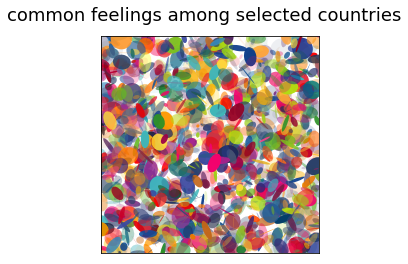


----------------------------------------------------------------------------


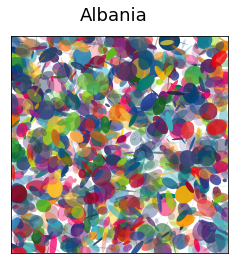


-------------------------------------------------------------------------

most common feeling among 2 countries is:
count       2955       
feelings    comfortable
Name: 271, dtype: object


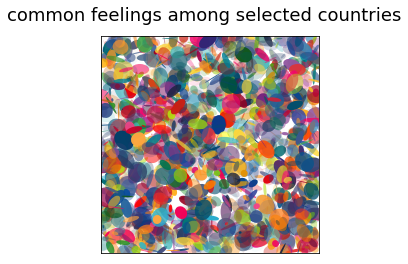


----------------------------------------------------------------------------


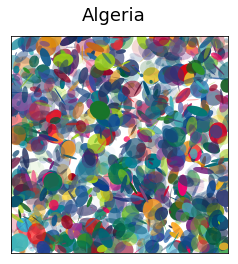


-------------------------------------------------------------------------

most common feeling among 3 countries is:
count       4496       
feelings    comfortable
Name: 288, dtype: object


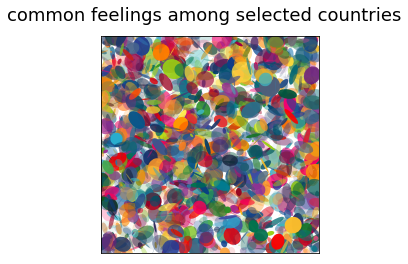


----------------------------------------------------------------------------


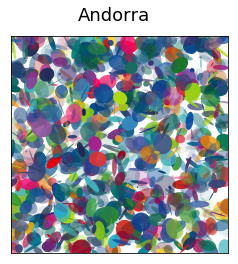


-------------------------------------------------------------------------

most common feeling among 4 countries is:
count       5902       
feelings    comfortable
Name: 289, dtype: object


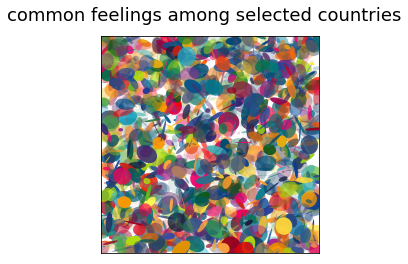


----------------------------------------------------------------------------


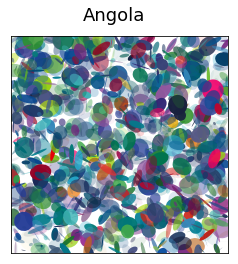


-------------------------------------------------------------------------

most common feeling among 5 countries is:
count       8299
feelings    bad 
Name: 115, dtype: object


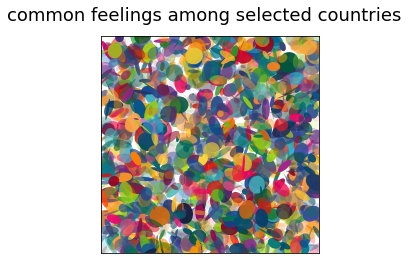


----------------------------------------------------------------------------


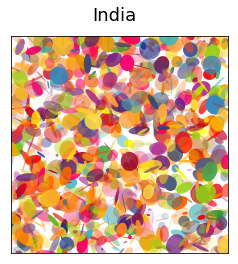


-------------------------------------------------------------------------

most common feeling among 6 countries is:
count       8299
feelings    bad 
Name: 129, dtype: object


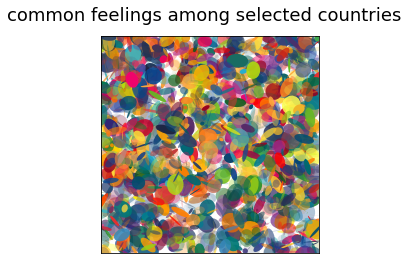


----------------------------------------------------------------------------


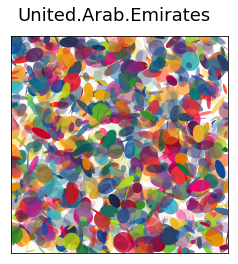


-------------------------------------------------------------------------

most common feeling among 7 countries is:
count       8518
feelings    bad 
Name: 129, dtype: object


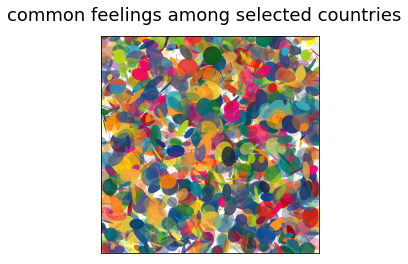


----------------------------------------------------------------------------


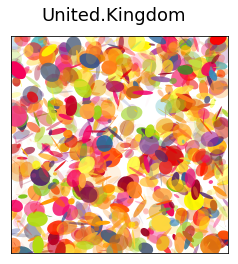


-------------------------------------------------------------------------

most common feeling among 8 countries is:
count       9265 
feelings    right
Name: 1555, dtype: object


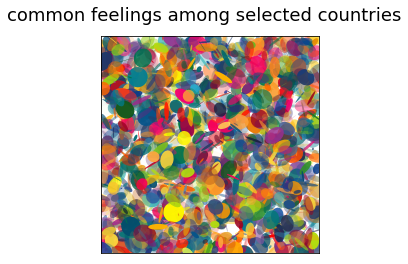


----------------------------------------------------------------------------


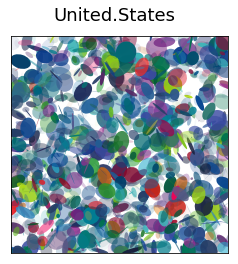


-------------------------------------------------------------------------

most common feeling among 9 countries is:
count       12880
feelings    bad  
Name: 129, dtype: object


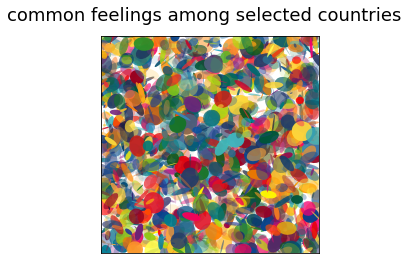


----------------------------------------------------------------------------


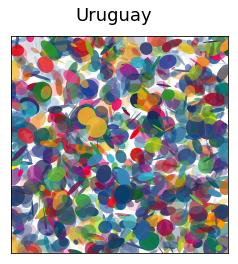


-------------------------------------------------------------------------

most common feeling among 10 countries is:
count       13632
feelings    bad  
Name: 129, dtype: object


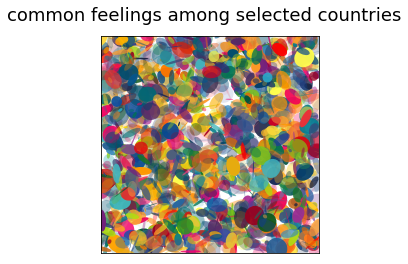


most common feeling among world is:
count       2812  
feelings    better
Name: 148, dtype: object

----------------------------------------------------------------------------


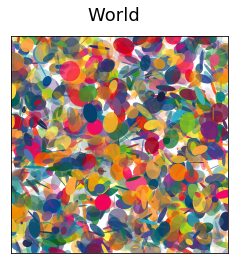

In [4]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
from collections import Counter
from pylab import figure, show, rand
from matplotlib.patches import Ellipse
import urllib.request

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 5000)


common_dataframe = DataFrame(columns=['feelings','count'])


def read_file(country,i):
    with urllib.request.urlopen('http://www.wefeelfine.org/data/files/feelings.txt') as connection :
        feelings_df = pd.read_csv(connection, header=None, sep="\t",skiprows=1)
        feelings_df.columns = ['feelings','frequency','color']       
    with urllib.request.urlopen("http://sim.unisa.edu.au/stats/countries/" +country+".txt") as file:
        global common_dataframe        
        data_split = (str(file.read().decode("utf-8"))).split(";")
        read_file = pd.DataFrame(data_split)
        read_file.columns = ['feelings']
        read_file['count'] = 1
        df = read_file.groupby(['feelings'])['count'].sum()
        country_df = pd.DataFrame({'feelings':df.index, 'count':df.values})
        if i == 72:
            world_common_feeling_index = country_df['count'].idxmax()
            print("\nmost common feeling among world is:")
            print(country_df.iloc[world_common_feeling_index,:])
        common_dataframe = common_dataframe.append(country_df)
        df3 = common_dataframe.groupby(['feelings'])['count'].sum()
        most_common_feelings_df = pd.DataFrame({'feelings':df3.index, 'count':df3.values})
        most_common_feelings_df_index = most_common_feelings_df['count'].idxmax()
    print("\n----------------------------------------------------------------------------")    
    merge_frame(country_df,feelings_df,country)
    if i >= 0 and i<10:
        print("\n-------------------------------------------------------------------------")
        print("\nmost common feeling among %d countries is:"%(i+1))
        print(most_common_feelings_df.iloc[most_common_feelings_df_index,:])
        merge_frame(most_common_feelings_df,feelings_df,'common feelings among selected countries')

def merge_frame(arr1,arr2,country):
    merge_columns = pd.merge(arr1,arr2,on='feelings',how='left')
    color = merge_columns['color']
    #print(merge_columns)
    plot_ecllipse(color,country)



def plot_ecllipse(arr,country):
    num = len(arr)  # The maximum number of feelings to be plotted. !!! Change this line of code !!!

# Create the figure.  The subplot '111' means a 1-row x 1-column subplot.  
# We include the subplot command as we need to use the handle ax in the for loop below.
    fig = figure()
    ax = fig.add_subplot(111, aspect='equal')


    for i in np.arange(num):
    # !!! Change this next line of code !!!
#         e = Ellipse(xy=rand(2)*10, width=rand(), height=rand(), angle=rand()*360,facecolor= '#' + arr[i][0])
        e = Ellipse(xy=rand(2)*10, width=rand(), height=rand(), angle=rand()*360,facecolor='#' + arr[i])

    # Now make the plot look more artistic (e.g. allow for transparent/opaque colouring)
        ax.add_artist(e)
        e.set_clip_box(ax.bbox)
        e.set_alpha(rand())  # Makes the ellipses transparent (0 = completely transparent, 1 = solid)
    
# Set the size of the plot
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)

# Do not plot the axis values
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

# Add a title to the plot 
    fig.suptitle(country,fontsize=18)  # !!! Change this title to include the current country name


# Show the plot
    show()

with open("./world_countries.txt",'r',encoding='utf-8') as file:
    data = str(file.read())
    split_file = data.rstrip().split("\n")
    for i in range(len(split_file)):
        print('%d.%s'%(i,split_file[i]))      
    countries_selected = []
    for i in range(0,len(split_file)):
        if len(countries_selected) == 10:
            print("you can choose only 9 countries at a time")
            break
        else :
            user_input = int(input("Choose the country:"))
            if split_file[user_input] in countries_selected :
                print("You have already selected this country")
            else :
                if ' ' in (split_file[user_input]) :
                    x = str(split_file[user_input]).replace(' ','.')
                    #print(x)
                    countries_selected.append(x)
                else:
                    countries_selected.append(split_file[user_input])
print("Countries that you have selected are:",countries_selected)                
for i in range(len(countries_selected)):
    read_file(countries_selected[i],i)
    
read_file('World',72)

